### Import Dependencies 

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

### Loading data set

In [93]:
gold = pd.read_csv("gld_price_data.csv")

df = gold.copy()

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [94]:
df.tail() # Last 5 element of the data set

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [96]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


### Data Visualization

(array([229., 317., 137., 210., 388., 474., 249., 165.,  43.,  78.]),
 array([1.039047 , 1.0950221, 1.1509972, 1.2069723, 1.2629474, 1.3189225,
        1.3748976, 1.4308727, 1.4868478, 1.5428229, 1.598798 ]),
 <BarContainer object of 10 artists>)

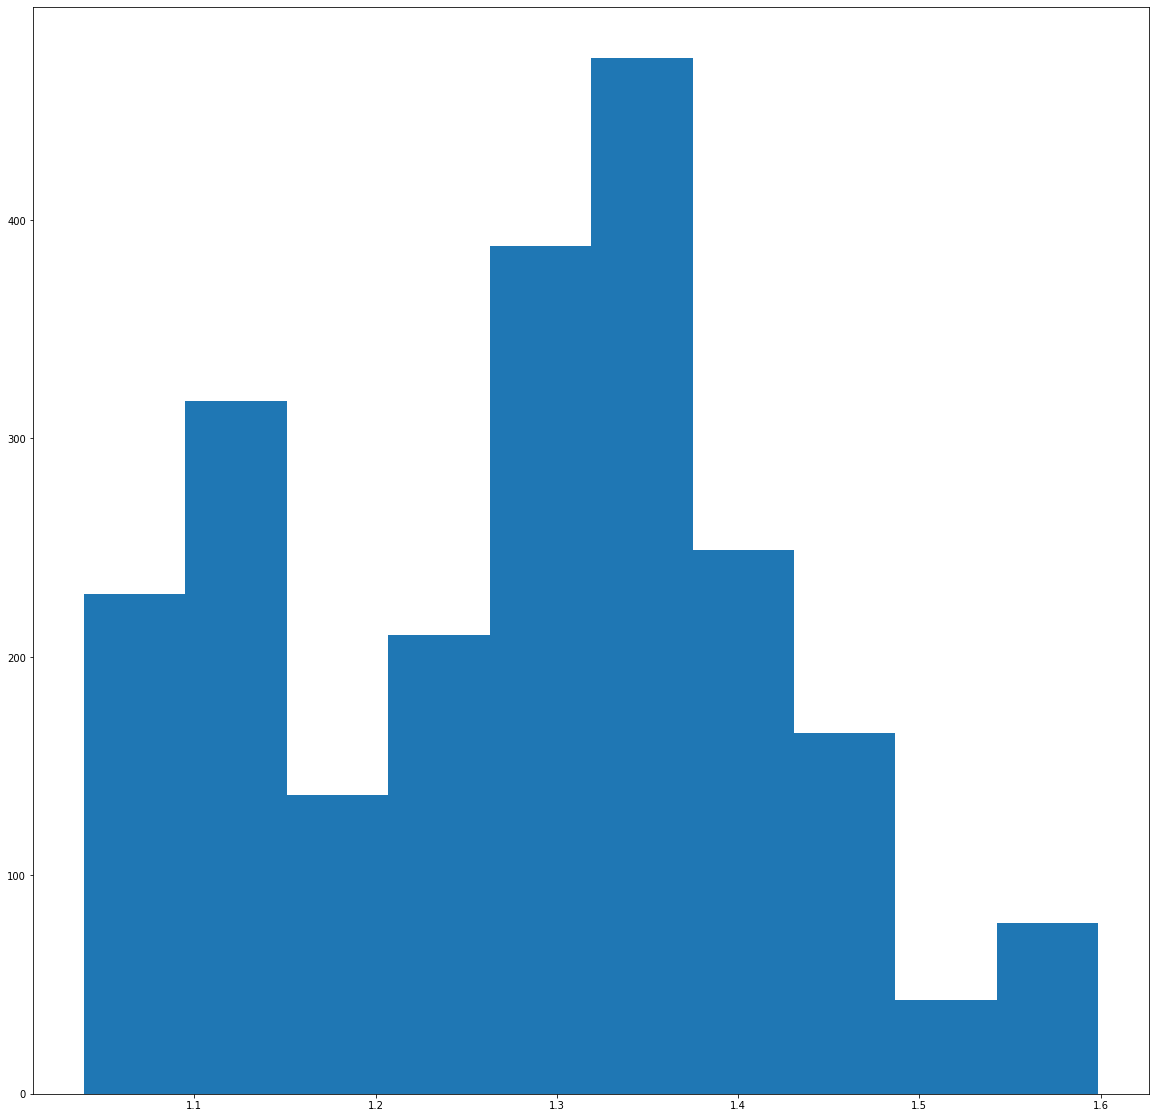

In [97]:
plt.figure(figsize=(20, 20))

plt.hist(df["EUR/USD"], bins=10)

<AxesSubplot:>

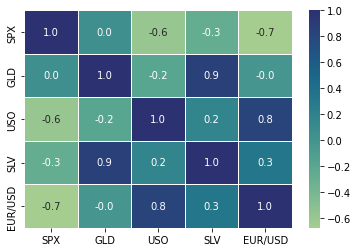

In [98]:
sns.heatmap(df.corr(), cmap="crest", annot=True, fmt=".1f", linewidths=.5)

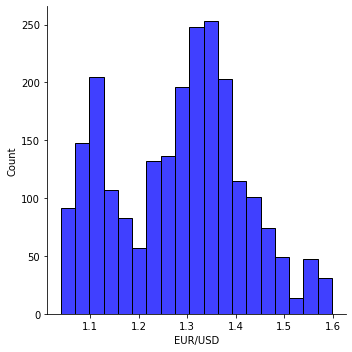

In [99]:
# Disturbution of the gold values

sns.displot(df["EUR/USD"], color="blue")

### Splitting the data


In [100]:
X = df.drop(["Date", "GLD"], axis=1)
y = df["GLD"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Model Training

In [101]:
model = RandomForestRegressor()

model.fit(X_train, y_train)




RandomForestRegressor()

### Model Evalutaion

In [104]:
acc = model.score(X_test, y_test)
print("Accuracy is: ", acc)

Accuracy is:  0.9901865564692689


In [105]:
# R squared error

error_score = metrics.r2_score(y_test, model.predict(X_test))
print("R squared error: ", error_score)

R squared error:  0.9901865564692689


In [107]:
new_data = df.iloc[:, 1:]
new_data = new_data.drop("GLD", axis=1)
new_data

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [109]:
model.predict(new_data.head())

array([84.99140054, 85.40859997, 85.29529823, 85.47169822, 86.76749911])

In [110]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099
